In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [12]:
DATA_PATH = 'data'
COLLECTORS = ['bryan', 'chris', 'jiayu', 'jurgen']

In [19]:
super_df = pd.DataFrame(columns=['timestamp', 'bssid', 'ssid', 'signal_strength', 'device_idx'])
for root, dirs, files in tqdm(os.walk(DATA_PATH)):
    path = root.split(os.sep)
    for file in files:
        if file.endswith('.csv'):
            device_idx = COLLECTORS.index(path[1])
            print(f'Processing {file} from {path[1]}')
            df = pd.read_csv(os.path.join(root, file), header=None, names=['timestamp', 'bssid', 'ssid', 'signal_strength'])
            df['device_idx'] = device_idx
            super_df = pd.concat([super_df, df], ignore_index=True)
super_df.head()

0it [00:00, ?it/s]

Processing wifi_signal_strength.csv from jurgen
Processing wifi_signal_strength.csv from jiayu
Processing wifi_signal_strength.csv from bryan
Processing wifi_signal_strength.csv from chris


,timestamp,bssid,ssid,signal_strength,device_idx
0,20240228113923,88:9C:AD:77:05:A2,SIT-POLY,79,3
1,20240228113923,88:9C:AD:77:7D:0D,SIT-POLY,72,3
2,20240228113923,88:9C:AD:E0:30:2D,SIT-POLY,69,3
3,20240228113923,88:9C:AD:71:0F:2D,SIT-POLY,65,3
4,20240228113923,88:9C:AD:E1:22:6D,SIT-POLY,62,3


In [14]:
import re

In [20]:
all_df = []
pattern = r'(\d{14}) - .*?Device (\S+)'
for root, dirs, files in tqdm(os.walk(DATA_PATH)):
    path = root.split(os.sep)
    for file in files:
        if file.endswith('.txt'):
            device_idx = COLLECTORS.index(path[1])
            print(f'Processing {file} from {path[1]}')
            unique_bt_devices = {}
            with open(os.path.join(root, file), "r") as f:
                lines = f.readlines()
            for line in lines:
                matches = re.findall(pattern, line)
                for timestamp, bt_device_id in matches:
                    if timestamp not in unique_bt_devices:
                        unique_bt_devices[timestamp] = {bt_device_id}
                    else:
                        unique_bt_devices[timestamp].add(bt_device_id)
            df = pd.DataFrame([(timestamp, len(devices), device_idx) for timestamp, devices in unique_bt_devices.items()], 
                              columns=['Timestamp', 'Bt_devices_total', 'device_idx'])
            all_df.append(df)

bluetooth_df = pd.concat(all_df, ignore_index=True)
print(bluetooth_df)

0it [00:00, ?it/s]

Processing btouput.txt from jurgen
Processing btoutput.txt from jiayu
Processing btoutput.txt from bryan
Processing btoutput.txt from chris
         Timestamp  Bt_devices_total  device_idx
0   20240228113928                32           3
1   20240228120052                56           3
2   20240228123047                59           3
3   20240228130407                57           3
4   20240228133047                44           3
..             ...               ...         ...
58  20240307133115                72           1
59  20240307134810                57           1
60  20240307140239                47           1
61  20240307141748                52           1
62  20240307143420                41           1

[63 rows x 3 columns]


In [21]:
super_df['bssid'].unique()

array(['88:9C:AD:77:05:A2', '88:9C:AD:77:7D:0D', '88:9C:AD:E0:30:2D',
       '88:9C:AD:71:0F:2D', '88:9C:AD:E1:22:6D', '88:9C:AD:77:05:AD',
       '88:9C:AD:77:CA:2D', '88:9C:AD:E1:20:2D', '88:9C:AD:E0:88:CD',
       '88:9C:AD:E1:1D:4D', '88:9C:AD:70:53:6D', '88:9C:AD:6F:C4:ED',
       '88:9C:AD:71:16:4D', '88:9C:AD:71:51:8D', '88:9C:AD:70:BF:2D',
       '88:9C:AD:70:34:CD', '88:9C:AD:71:0B:ED', '88:9C:AD:E0:D1:4D',
       '88:9C:AD:71:0B:E2', '88:9C:AD:E1:5E:42', '88:9C:AD:72:B7:8D',
       '88:9C:AD:71:16:42', '88:9C:AD:E1:5E:4D', '88:9C:AD:E0:30:22',
       '88:9C:AD:E1:1D:42', '88:9C:AD:77:CA:22', '88:9C:AD:70:BF:22'],
      dtype=object)

In [22]:
super_df.head()

,timestamp,bssid,ssid,signal_strength,device_idx
0,20240228113923,88:9C:AD:77:05:A2,SIT-POLY,79,3
1,20240228113923,88:9C:AD:77:7D:0D,SIT-POLY,72,3
2,20240228113923,88:9C:AD:E0:30:2D,SIT-POLY,69,3
3,20240228113923,88:9C:AD:71:0F:2D,SIT-POLY,65,3
4,20240228113923,88:9C:AD:E1:22:6D,SIT-POLY,62,3


In [23]:
super_df[super_df['timestamp'].isna()]

,timestamp,bssid,ssid,signal_strength,device_idx


In [24]:
super_df['timestamp'] = super_df['timestamp'].apply(int).apply(str)

In [25]:
super_df[super_df['timestamp'].str.len() != 14]

,timestamp,bssid,ssid,signal_strength,device_idx


In [26]:
super_df['timestamp'] = pd.to_datetime(super_df['timestamp'], format='%Y%m%d%H%M%S')

In [27]:
common_bssids = []
for device_idx in range(4):
    bssids = super_df[super_df['device_idx'] == device_idx]['bssid'].unique()
    common_bssids.append(bssids)
common_bssids = set.intersection(*map(set, common_bssids))
print(common_bssids)

{'88:9C:AD:77:7D:0D', '88:9C:AD:77:05:AD', '88:9C:AD:E0:30:2D', '88:9C:AD:E0:88:CD', '88:9C:AD:70:34:CD', '88:9C:AD:71:0F:2D', '88:9C:AD:E1:20:2D', '88:9C:AD:E0:D1:4D', '88:9C:AD:71:51:8D', '88:9C:AD:77:CA:2D', '88:9C:AD:E1:1D:4D'}


In [28]:
super_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        839 non-null    datetime64[ns]
 1   bssid            839 non-null    object        
 2   ssid             839 non-null    object        
 3   signal_strength  839 non-null    object        
 4   device_idx       839 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 32.9+ KB


In [29]:
super_df[super_df['device_idx'] == 1]['timestamp'].unique()

<DatetimeArray>
['2024-02-28 11:39:29', '2024-02-28 12:03:29', '2024-02-28 12:32:37',
 '2024-02-28 13:00:52', '2024-02-28 13:31:02', '2024-02-28 13:59:23',
 '2024-02-28 14:29:33', '2024-02-28 15:00:24', '2024-02-28 15:29:32',
 '2024-02-28 15:59:35', '2024-03-07 12:34:28', '2024-03-07 13:31:15',
 '2024-03-07 13:48:10', '2024-03-07 14:02:39', '2024-03-07 14:17:48',
 '2024-03-07 14:34:20']
Length: 16, dtype: datetime64[ns]

In [ ]:
corrections = {
    '2024-02-28 10:24:39': '2024-02-28 11:39:29',
    '2024-02-28 10:47:32': '2024-02-28 12:03:29',
    '2024-02-28 11:16:59': '2024-02-28 12:32:37'
}

In [ ]:
for ts, correct_ts in corrections.items():
    super_df.loc[super_df['timestamp'] == datetime.datetime.strptime(ts, '%Y-%m-%d %H:%M:%S'), 'timestamp'] = datetime.datetime.strptime(correct_ts, '%Y-%m-%d %H:%M:%S')

<Axes: xlabel='timestamp', ylabel='Count'>

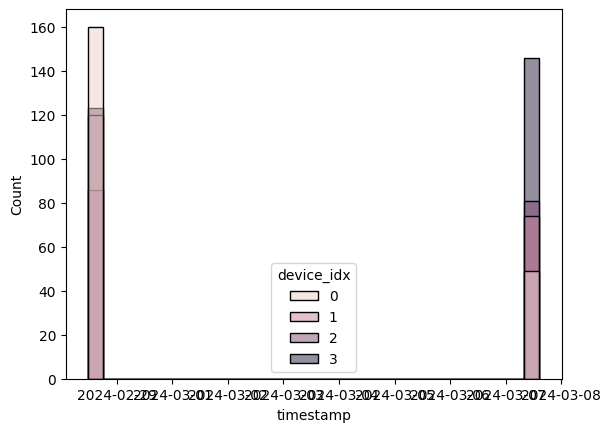

In [33]:
sns.histplot(super_df, x='timestamp', bins=30, hue='device_idx')

In [95]:
bins1 = pd.date_range('2024-02-28 11:20:00', '2024-02-28 16:20:00', freq='30 min')
bins1

DatetimeIndex(['2024-02-28 11:20:00', '2024-02-28 11:50:00',
               '2024-02-28 12:20:00', '2024-02-28 12:50:00',
               '2024-02-28 13:20:00', '2024-02-28 13:50:00',
               '2024-02-28 14:20:00', '2024-02-28 14:50:00',
               '2024-02-28 15:20:00', '2024-02-28 15:50:00',
               '2024-02-28 16:20:00'],
              dtype='datetime64[ns]', freq='30min')

In [96]:
bins2 = pd.date_range('2024-03-07 12:30:00', '2024-03-07 14:30:00', freq='15 min')
bins2

DatetimeIndex(['2024-03-07 12:30:00', '2024-03-07 12:45:00',
               '2024-03-07 13:00:00', '2024-03-07 13:15:00',
               '2024-03-07 13:30:00', '2024-03-07 13:45:00',
               '2024-03-07 14:00:00', '2024-03-07 14:15:00',
               '2024-03-07 14:30:00'],
              dtype='datetime64[ns]', freq='15min')

In [97]:
bins = bins1.union(bins2)

In [98]:
super_df['binned_timestamp'] = pd.cut(super_df['timestamp'], bins=bins)

In [99]:
super_df['binned_timestamp'].unique()

[(2024-02-28 11:20:00, 2024-02-28 11:50:00], (2024-02-28 11:50:00, 2024-02-28 12:20:00], (2024-02-28 12:20:00, 2024-02-28 12:50:00], (2024-02-28 12:50:00, 2024-02-28 13:20:00], (2024-02-28 13:20:00, 2024-02-28 13:50:00], ..., (2024-03-07 13:30:00, 2024-03-07 13:45:00], (2024-03-07 13:45:00, 2024-03-07 14:00:00], (2024-03-07 14:00:00, 2024-03-07 14:15:00], (2024-03-07 14:15:00, 2024-03-07 14:30:00], NaN]
Length: 16
Categories (19, interval[datetime64[ns], right]): [(2024-02-28 11:20:00, 2024-02-28 11:50:00] < (2024-02-28 11:50:00, 2024-02-28 12:20:00] < (2024-02-28 12:20:00, 2024-02-28 12:50:00] < (2024-02-28 12:50:00, 2024-02-28 13:20:00] ... (2024-03-07 13:30:00, 2024-03-07 13:45:00] < (2024-03-07 13:45:00, 2024-03-07 14:00:00] < (2024-03-07 14:00:00, 2024-03-07 14:15:00] < (2024-03-07 14:15:00, 2024-03-07 14:30:00]]

In [113]:
pivoted_table = super_df.pivot_table(index=['binned_timestamp'], columns=['bssid', 'device_idx'], values=['signal_strength'], observed=True, fill_value=0, aggfunc='mean', dropna=False)
pivoted_table

/var/folders/p4/sy49z7q136d8_80bc8vw4zr00000gn/T/ipykernel_17181/2432892961.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivoted_table = super_df.pivot_table(index=['binned_timestamp'], columns=['bssid', 'device_idx'], values=['signal_strength'], observed=True, fill_value=0, aggfunc='mean', dropna=False)


signal_strength                 \
bssid                                      88:9C:AD:6F:C4:ED                  
device_idx                                                 0  1     2     3   
binned_timestamp                                                              
(2024-02-28 11:20:00, 2024-02-28 11:50:00]              30.0  0  79.0  24.0   
(2024-02-28 11:50:00, 2024-02-28 12:20:00]              27.0  0  65.0  40.0   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]              34.0  0  70.0  19.0   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]              22.0  0  59.0   0.0   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]              29.0  0   0.0   0.0   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]              53.0  0   0.0  35.0   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]              52.0  0  69.0  24.0   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]               0.0  0   0.0  24.0   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]              51.5  0  70.0  20.0   
(2024-02-28 15:50:00, 2024-02-28 16:20:00]              54.0  0   0.0  24.0   
(2024-03-07 12:30:00, 2024-03-07 12:45:00]              30.0  0  50.0   0.0   
(2024-03-07 13:30:00, 2024-03-07 13:45:00]              37.0  0  62.0  24.0   
(2024-03-07 13:45:00, 2024-03-07 14:00:00]              39.0  0  67.0  24.0   
(2024-03-07 14:00:00, 2024-03-07 14:15:00]              49.0  0  55.0  24.0   
(2024-03-07 14:15:00, 2024-03-07 14:30:00]              40.0  0  67.0  30.0   
NaN                                                      0.0  0  35.0   0.0   

                                                                          \
bssid                                      88:9C:AD:70:34:CD               
device_idx                                                 0     1     2   
binned_timestamp                                                           
(2024-02-28 11:20:00, 2024-02-28 11:50:00]              54.0  24.0  29.0   
(2024-02-28 11:50:00, 2024-02-28 12:20:00]              47.0  24.0   0.0   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]              50.0  24.0   0.0   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]              47.0  27.0   0.0   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]              54.0  24.0   0.0   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]               0.0  25.0   0.0   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]              49.0  24.0   0.0   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]               0.0   0.0   0.0   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]              51.0  24.0   0.0   
(2024-02-28 15:50:00, 2024-02-28 16:20:00]              54.0  29.0   0.0   
(2024-03-07 12:30:00, 2024-03-07 12:45:00]               0.0  25.0   0.0   
(2024-03-07 13:30:00, 2024-03-07 13:45:00]              44.0  29.0  49.0   
(2024-03-07 13:45:00, 2024-03-07 14:00:00]               0.0  29.0   0.0   
(2024-03-07 14:00:00, 2024-03-07 14:15:00]               0.0  25.0   0.0   
(2024-03-07 14:15:00, 2024-03-07 14:30:00]              49.0  29.0   0.0   
NaN                                                      0.0   0.0   0.0   

                                                                       ...  \
bssid                                            88:9C:AD:70:53:6D     ...   
device_idx                                     3                 0  1  ...   
binned_timestamp                                                       ...   
(2024-02-28 11:20:00, 2024-02-28 11:50:00]   0.0              52.0  0  ...   
(2024-02-28 11:50:00, 2024-02-28 12:20:00]   0.0              57.0  0  ...   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]  27.0              50.0  0  ...   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]  25.0              62.0  0  ...   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]  32.0              55.0  0  ...   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]   0.0              59.0  0  ...   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]  22.0              60.5  0  ...   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]  30.0              52.0  0  ...   
(2024-0

In [105]:
bluetooth_df["binned_timestamp"] = pd.cut(bluetooth_df["Timestamp"], bins=bins)

In [109]:
pivoted_bt_table = bluetooth_df.pivot_table(index=['binned_timestamp'], columns=['device_idx'], values=['Bt_devices_total'], observed=True, fill_value=0, aggfunc='mean', dropna=False)
bt_tabular = pd.DataFrame(pivoted_bt_table.to_records())

In [114]:
bt_tabular

,binned_timestamp,"('Bt_devices_total', 0)","('Bt_devices_total', 1)","('Bt_devices_total', 2)","('Bt_devices_total', 3)"
0,"(2024-02-28 11:20:00, 2024-02-28 11:50:00]",5.0,53.0,21.0,32.0
1,"(2024-02-28 11:50:00, 2024-02-28 12:20:00]",14.0,41.0,94.0,56.0
2,"(2024-02-28 12:20:00, 2024-02-28 12:50:00]",17.0,62.0,66.0,59.0
3,"(2024-02-28 12:50:00, 2024-02-28 13:20:00]",23.0,19.0,89.0,57.0
4,"(2024-02-28 13:20:00, 2024-02-28 13:50:00]",8.0,44.0,0.0,44.0
5,"(2024-02-28 13:50:00, 2024-02-28 14:20:00]",5.0,17.0,0.0,12.0
6,"(2024-02-28 14:20:00, 2024-02-28 14:50:00]",7.5,21.0,28.0,15.0
7,"(2024-02-28 14:50:00, 2024-02-28 15:20:00]",5.0,26.0,0.0,12.0
8,"(2024-02-28 15:20:00, 2024-02-28 15:50:00]",7.5,40.0,32.0,20.0
9,"(2024-02-28 15:50:00, 2024-02-28 16:20:00]",6.0,23.0,0.0,14.0


In [116]:
tabular = pd.DataFrame(pivoted_table.to_records())

In [117]:
combined_tabular = pd.merge(tabular, bt_tabular, on='binned_timestamp', how='left')
combined_tabular

,binned_timestamp,"('signal_strength', '88:9C:AD:6F:C4:ED', 0)","('signal_strength', '88:9C:AD:6F:C4:ED', 1)","('signal_strength', '88:9C:AD:6F:C4:ED', 2)","('signal_strength', '88:9C:AD:6F:C4:ED', 3)","('signal_strength', '88:9C:AD:70:34:CD', 0)","('signal_strength', '88:9C:AD:70:34:CD', 1)","('signal_strength', '88:9C:AD:70:34:CD', 2)","('signal_strength', '88:9C:AD:70:34:CD', 3)","('signal_strength', '88:9C:AD:70:53:6D', 0)",...,"('signal_strength', '88:9C:AD:E1:5E:42', 2)","('signal_strength', '88:9C:AD:E1:5E:42', 3)","('signal_strength', '88:9C:AD:E1:5E:4D', 0)","('signal_strength', '88:9C:AD:E1:5E:4D', 1)","('signal_strength', '88:9C:AD:E1:5E:4D', 2)","('signal_strength', '88:9C:AD:E1:5E:4D', 3)","('Bt_devices_total', 0)","('Bt_devices_total', 1)","('Bt_devices_total', 2)","('Bt_devices_total', 3)"
0,"(2024-02-28 11:20:00, 2024-02-28 11:50:00]",30.0,0,79.0,24.0,54.0,24.0,29.0,0.0,52.0,...,69.0,0,52.0,0,0.0,0,5.0,53.0,21.0,32.0
1,"(2024-02-28 11:50:00, 2024-02-28 12:20:00]",27.0,0,65.0,40.0,47.0,24.0,0.0,0.0,57.0,...,65.0,0,54.0,0,69.0,0,14.0,41.0,94.0,56.0
2,"(2024-02-28 12:20:00, 2024-02-28 12:50:00]",34.0,0,70.0,19.0,50.0,24.0,0.0,27.0,50.0,...,74.0,0,55.0,0,57.0,0,17.0,62.0,66.0,59.0
3,"(2024-02-28 12:50:00, 2024-02-28 13:20:00]",22.0,0,59.0,0.0,47.0,27.0,0.0,25.0,62.0,...,0.0,0,45.0,0,67.0,0,23.0,19.0,89.0,57.0
4,"(2024-02-28 13:20:00, 2024-02-28 13:50:00]",29.0,0,0.0,0.0,54.0,24.0,0.0,32.0,55.0,...,0.0,0,60.0,0,0.0,0,8.0,44.0,0.0,44.0
5,"(2024-02-28 13:50:00, 2024-02-28 14:20:00]",53.0,0,0.0,35.0,0.0,25.0,0.0,0.0,59.0,...,0.0,0,62.0,0,0.0,0,5.0,17.0,0.0,12.0
6,"(2024-02-28 14:20:00, 2024-02-28 14:50:00]",52.0,0,69.0,24.0,49.0,24.0,0.0,22.0,60.5,...,69.0,0,58.0,0,59.0,0,7.5,21.0,28.0,15.0
7,"(2024-02-28 14:50:00, 2024-02-28 15:20:00]",0.0,0,0.0,24.0,0.0,0.0,0.0,30.0,52.0,...,0.0,0,52.0,0,0.0,0,5.0,26.0,0.0,12.0
8,"(2024-02-28 15:20:00, 2024-02-28 15:50:00]",51.5,0,70.0,20.0,51.0,24.0,0.0,30.0,59.5,...,69.0,0,62.5,0,60.0,0,7.5,40.0,32.0,20.0
9,"(2024-02-28 15:50:00, 2024-02-28 16:20:00]",54.0,0,0.0,24.0,54.0,29.0,0.0,27.0,55.0,...,0.0,0,60.0,0,0.0,0,6.0,23.0,0.0,14.0


In [118]:
population = [56, 128, 99, 109, 75, np.nan, 23, 38, 34, 21, 165, 55, 38, 30, 31, 17]
combined_tabular['population'] = population
combined_tabular.dropna(inplace=True)

In [120]:
combined_tabular

,binned_timestamp,"('signal_strength', '88:9C:AD:6F:C4:ED', 0)","('signal_strength', '88:9C:AD:6F:C4:ED', 1)","('signal_strength', '88:9C:AD:6F:C4:ED', 2)","('signal_strength', '88:9C:AD:6F:C4:ED', 3)","('signal_strength', '88:9C:AD:70:34:CD', 0)","('signal_strength', '88:9C:AD:70:34:CD', 1)","('signal_strength', '88:9C:AD:70:34:CD', 2)","('signal_strength', '88:9C:AD:70:34:CD', 3)","('signal_strength', '88:9C:AD:70:53:6D', 0)",...,"('signal_strength', '88:9C:AD:E1:5E:42', 3)","('signal_strength', '88:9C:AD:E1:5E:4D', 0)","('signal_strength', '88:9C:AD:E1:5E:4D', 1)","('signal_strength', '88:9C:AD:E1:5E:4D', 2)","('signal_strength', '88:9C:AD:E1:5E:4D', 3)","('Bt_devices_total', 0)","('Bt_devices_total', 1)","('Bt_devices_total', 2)","('Bt_devices_total', 3)",population
0,"(2024-02-28 11:20:00, 2024-02-28 11:50:00]",30.0,0,79.0,24.0,54.0,24.0,29.0,0.0,52.0,...,0,52.0,0,0.0,0,5.0,53.0,21.0,32.0,56.0
1,"(2024-02-28 11:50:00, 2024-02-28 12:20:00]",27.0,0,65.0,40.0,47.0,24.0,0.0,0.0,57.0,...,0,54.0,0,69.0,0,14.0,41.0,94.0,56.0,128.0
2,"(2024-02-28 12:20:00, 2024-02-28 12:50:00]",34.0,0,70.0,19.0,50.0,24.0,0.0,27.0,50.0,...,0,55.0,0,57.0,0,17.0,62.0,66.0,59.0,99.0
3,"(2024-02-28 12:50:00, 2024-02-28 13:20:00]",22.0,0,59.0,0.0,47.0,27.0,0.0,25.0,62.0,...,0,45.0,0,67.0,0,23.0,19.0,89.0,57.0,109.0
4,"(2024-02-28 13:20:00, 2024-02-28 13:50:00]",29.0,0,0.0,0.0,54.0,24.0,0.0,32.0,55.0,...,0,60.0,0,0.0,0,8.0,44.0,0.0,44.0,75.0
6,"(2024-02-28 14:20:00, 2024-02-28 14:50:00]",52.0,0,69.0,24.0,49.0,24.0,0.0,22.0,60.5,...,0,58.0,0,59.0,0,7.5,21.0,28.0,15.0,23.0
7,"(2024-02-28 14:50:00, 2024-02-28 15:20:00]",0.0,0,0.0,24.0,0.0,0.0,0.0,30.0,52.0,...,0,52.0,0,0.0,0,5.0,26.0,0.0,12.0,38.0
8,"(2024-02-28 15:20:00, 2024-02-28 15:50:00]",51.5,0,70.0,20.0,51.0,24.0,0.0,30.0,59.5,...,0,62.5,0,60.0,0,7.5,40.0,32.0,20.0,34.0
9,"(2024-02-28 15:50:00, 2024-02-28 16:20:00]",54.0,0,0.0,24.0,54.0,29.0,0.0,27.0,55.0,...,0,60.0,0,0.0,0,6.0,23.0,0.0,14.0,21.0
10,"(2024-03-07 12:30:00, 2024-03-07 12:45:00]",30.0,0,50.0,0.0,0.0,25.0,0.0,34.0,45.0,...,0,0.0,0,72.0,0,22.0,128.0,10.0,50.0,165.0


In [71]:
tabular.columns[1]

"('signal_strength', '88:9C:AD:6F:C4:ED', 0)"

/var/folders/p4/sy49z7q136d8_80bc8vw4zr00000gn/T/ipykernel_17181/1976388438.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '88:9C:AD:77:05:A2'),
 Text(1, 0, '88:9C:AD:77:7D:0D'),
 Text(2, 0, '88:9C:AD:E0:30:2D'),
 Text(3, 0, '88:9C:AD:71:0F:2D'),
 Text(4, 0, '88:9C:AD:E1:22:6D'),
 Text(5, 0, '88:9C:AD:77:05:AD'),
 Text(6, 0, '88:9C:AD:77:CA:2D'),
 Text(7, 0, '88:9C:AD:E1:20:2D'),
 Text(8, 0, '88:9C:AD:E0:88:CD'),
 Text(9, 0, '88:9C:AD:E1:1D:4D'),
 Text(10, 0, '88:9C:AD:70:53:6D'),
 Text(11, 0, '88:9C:AD:6F:C4:ED'),
 Text(12, 0, '88:9C:AD:71:16:4D'),
 Text(13, 0, '88:9C:AD:71:51:8D'),
 Text(14, 0, '88:9C:AD:70:BF:2D'),
 Text(15, 0, '88:9C:AD:70:34:CD'),
 Text(16, 0, '88:9C:AD:71:0B:ED'),
 Text(17, 0, '88:9C:AD:E0:D1:4D'),
 Text(18, 0, '88:9C:AD:71:0B:E2'),
 Text(19, 0, '88:9C:AD:E1:5E:42'),
 Text(20, 0, '88:9C:AD:72:B7:8D'),
 Text(21, 0, '88:9C:AD:71:16:42'),
 Text(22, 0, '88:9C:AD:E1:5E:4D'),
 Text(23, 0, '88:9C:AD:E0:30:22'),
 Text(24, 0, '88:9C:AD:E1:1D:42'),
 Text(25, 0, '88:9C:AD:77:CA:22'),
 Text(26, 0, '88:9C:AD:70:BF:22')]

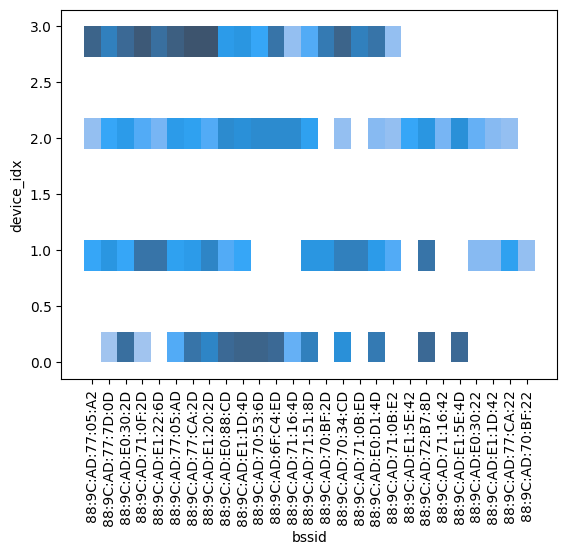

In [72]:
ax = sns.histplot(super_df, x='bssid', y='device_idx')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [121]:
super_df['binned_timestamp'][0].left + datetime.timedelta(minutes=10)

Timestamp('2024-02-28 11:30:00')

In [123]:
super_df.info()
super_df['binned_timestamp_str'] = super_df['binned_timestamp'].apply(lambda x: x.left + datetime.timedelta(minutes=10)).apply(datetime.datetime.strftime, format='%Y-%m-%d %H:%M:%S')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             839 non-null    datetime64[ns]
 1   bssid                 839 non-null    object        
 2   ssid                  839 non-null    object        
 3   signal_strength       839 non-null    object        
 4   device_idx            839 non-null    object        
 5   binned_timestamp      786 non-null    category      
 6   binned_timestamp_str  839 non-null    category      
dtypes: category(2), datetime64[ns](1), object(4)
memory usage: 36.6+ KB


/var/folders/p4/sy49z7q136d8_80bc8vw4zr00000gn/T/ipykernel_17181/936762956.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '88:9C:AD:77:05:A2'),
 Text(1, 0, '88:9C:AD:77:7D:0D'),
 Text(2, 0, '88:9C:AD:E0:30:2D'),
 Text(3, 0, '88:9C:AD:71:0F:2D'),
 Text(4, 0, '88:9C:AD:E1:22:6D'),
 Text(5, 0, '88:9C:AD:77:05:AD'),
 Text(6, 0, '88:9C:AD:77:CA:2D'),
 Text(7, 0, '88:9C:AD:E1:20:2D'),
 Text(8, 0, '88:9C:AD:E0:88:CD'),
 Text(9, 0, '88:9C:AD:E1:1D:4D'),
 Text(10, 0, '88:9C:AD:70:53:6D'),
 Text(11, 0, '88:9C:AD:6F:C4:ED'),
 Text(12, 0, '88:9C:AD:71:16:4D'),
 Text(13, 0, '88:9C:AD:71:51:8D'),
 Text(14, 0, '88:9C:AD:70:BF:2D'),
 Text(15, 0, '88:9C:AD:70:34:CD'),
 Text(16, 0, '88:9C:AD:71:0B:ED'),
 Text(17, 0, '88:9C:AD:E0:D1:4D'),
 Text(18, 0, '88:9C:AD:71:0B:E2'),
 Text(19, 0, '88:9C:AD:E1:5E:42'),
 Text(20, 0, '88:9C:AD:72:B7:8D'),
 Text(21, 0, '88:9C:AD:71:16:42'),
 Text(22, 0, '88:9C:AD:E1:5E:4D'),
 Text(23, 0, '88:9C:AD:E0:30:22'),
 Text(24, 0, '88:9C:AD:E1:1D:42'),
 Text(25, 0, '88:9C:AD:77:CA:22'),
 Text(26, 0, '88:9C:AD:70:BF:22')]

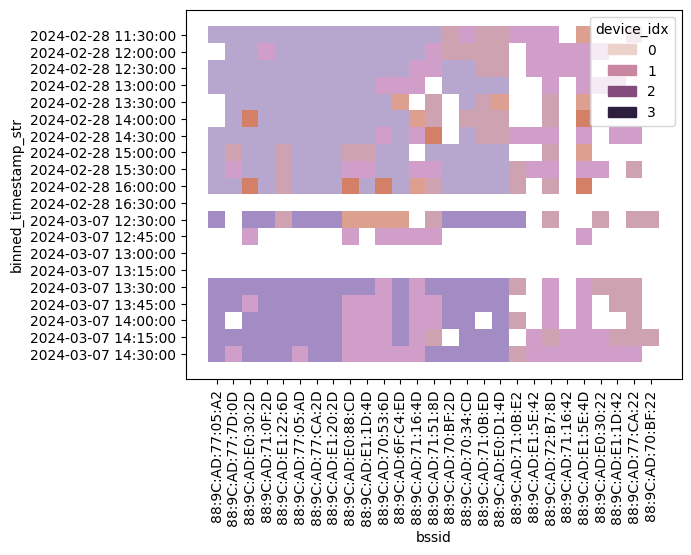

In [75]:
ax = sns.histplot(super_df, x='bssid', y='binned_timestamp_str', hue='device_idx')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [130]:
combined_tabular.iloc[0, -5:-1]

('Bt_devices_total', 0)     5.0
('Bt_devices_total', 1)    53.0
('Bt_devices_total', 2)    21.0
('Bt_devices_total', 3)    32.0
Name: 0, dtype: object

In [131]:
combined_tabular["bt_devices_summed"] = combined_tabular.iloc[:, -5:-1].sum(axis=1)

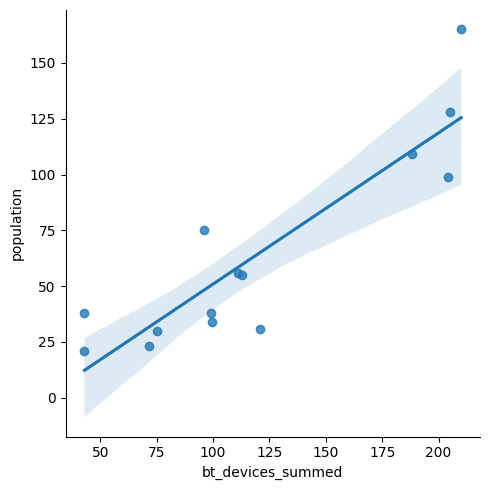

In [133]:
sns.lmplot(data=combined_tabular, x='bt_devices_summed', y="population")

# MLR

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold

In [135]:
FOLDS = 3

In [ ]:
[1 + i * 4 for i in range(26)]

In [ ]:
tabular[tabular.columns[[1 + 3 + i * 4 for i in range(26)]]]

In [ ]:
# X = tabular.drop(columns=['binned_timestamp', 'population'])
# Get only 1st device
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [137]:
X = combined_tabular.drop(columns=['binned_timestamp', 'population'])
y = combined_tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.1309665480509692


10

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LinearRegression().fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold

In [ ]:
FOLDS = 3

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x_train)
    reg = LinearRegression().fit(X_poly, y_train)
    print(f"device_idx {device_idx}: {reg.score(poly_reg.transform(x_test), y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression().fit(X_poly, y_train)
print(f"all devices: {reg.score(poly_reg.transform(x_test), y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x_train)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LinearRegression().fit(X_poly, y_train)
    scores.append(reg.score(poly_reg.transform(x_test), y_test))

scores

# Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = SVR(kernel = 'rbf').fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = SVR(kernel = 'rbf').fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = SVR(kernel = 'rbf').fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

# KRR

In [ ]:
from sklearn.kernel_ridge import KernelRidge

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

# LRR

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

# GPR

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    kernel = DotProduct() + WhiteKernel()
    reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kernel = DotProduct() + WhiteKernel()
reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    kernel = DotProduct() + WhiteKernel()
    reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

# Lasso

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LassoCV(cv=5, tol=0.1, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LassoCV(cv=5, tol=0.1, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LassoCV(cv=5, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

In [ ]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

In [ ]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores